In [1]:
from models.CIFAR10_Models import *
import torch
import numpy as np
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import utils
from art import config
from art.utils import load_dataset, get_file
from art.estimators.classification import PyTorchClassifier
from art.attacks.evasion import FastGradientMethod, BasicIterativeMethod, ProjectedGradientDescent, DeepFool
from art.defences.trainer import AdversarialTrainer
from copy import deepcopy

In [2]:
# Load the data
BATCH_SIZE = 256

torch.manual_seed(42)
np.random.seed(42)
generator = torch.Generator().manual_seed(42)

# Define the transformation
train_transform = transforms.Compose([
    transforms.RandomRotation(10),
    transforms.RandomAffine(0, translate=(0.1, 0.1)), 
    transforms.ToTensor(), 
    transforms.Normalize((0.1307,), (0.3081,)),
])

test_transform = transforms.Compose([
    transforms.ToTensor(), 
    transforms.Normalize((0.1307,), (0.3081,)),
])

# Load the CIFAR10 dataset
train_dataset = datasets.CIFAR10(root='./data', train=True, transform=train_transform, download=True)
test_dataset = datasets.CIFAR10(root='./data', train=False, transform=test_transform, download=True)

# Split the training dataset into training and validation datasets
train_dataset, val_dataset = random_split(train_dataset, [50000, 10000], generator=generator)

# Create the dataloaders
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

X_train, y_train = utils.loader_to_numpy(train_loader)
X_val, y_val = utils.loader_to_numpy(val_loader)
X_test, y_test = utils.loader_to_numpy(test_loader)

Clean accuracy: 0.9845
Accuracy on adversarial test data:  0.3286


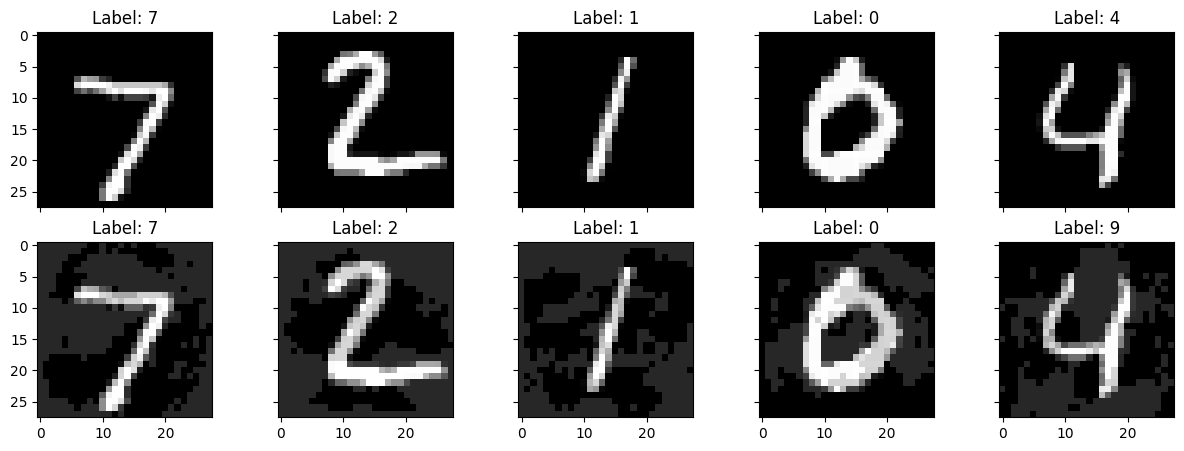

In [24]:
BATCH_SIZE = 1000

# load the FC model
clean_model = CIFAR10_FC_500_100_10()
clean_model.load_state_dict(torch.load('models/clean_state/CIFAR10_FC_500_100_10.pth'))
clean_model.eval()
clean_classifier = PyTorchClassifier(
    model=clean_model,
    loss=torch.nn.CrossEntropyLoss(),
    optimizer=torch.optim.Adam(clean_model.parameters(), lr=0.01),
    input_shape=(1, 28, 28),
    nb_classes=10,
    preprocessing=(0.1307, 0.3081),
    device_type='gpu'
)

# Get the clean accuracy
clean_acc = np.sum(np.argmax(clean_classifier.predict(X_test), axis=1) == y_test) / len(y_test)
print(f'Clean accuracy: {clean_acc}')

attack = FastGradientMethod(clean_classifier, batch_size=BATCH_SIZE)

print('Accuracy on adversarial test data: ', utils.evaluate_attack(attack, clean_classifier, X_test, y_test))
utils.plot_images(X_test, y_test, clean_classifier, attack, n=5)

PGD - Batches:   0%|          | 0/10 [00:00<?, ?it/s]

Accuracy on adversarial test data:  0.0597


PGD - Batches:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Batches:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Batches:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Batches:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Batches:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Batches:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Batches:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Batches:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Batches:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Batches:   0%|          | 0/1 [00:00<?, ?it/s]

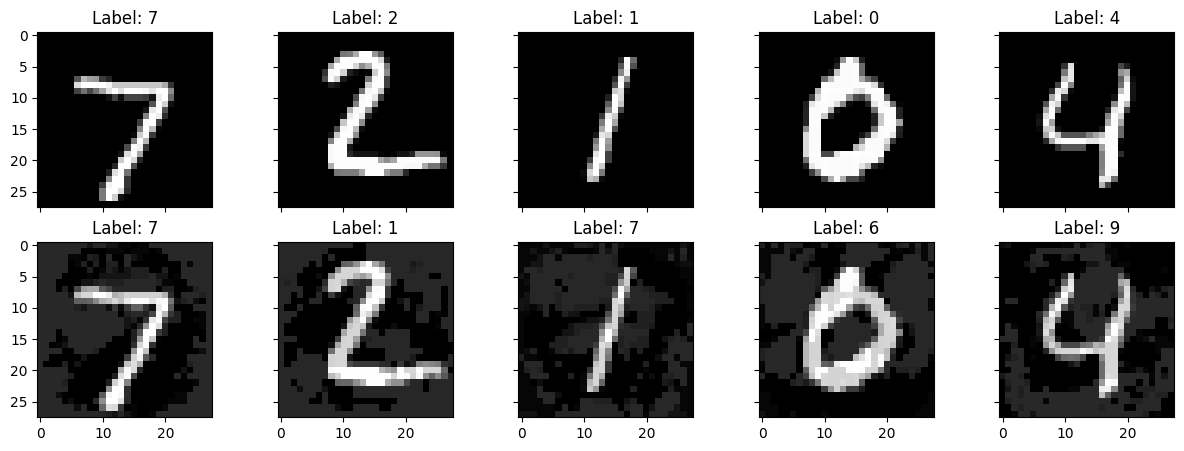

In [4]:
# Try FastGradientMethod
attack = BasicIterativeMethod(clean_classifier, batch_size=BATCH_SIZE)

print('Accuracy on adversarial test data: ', utils.evaluate_attack(attack, clean_classifier, X_test, y_test))
utils.plot_images(X_test, y_test, clean_classifier, attack, n=5)

PGD - Batches:   0%|          | 0/10 [00:00<?, ?it/s]

Accuracy on adversarial test data:  0.0597


PGD - Batches:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Batches:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Batches:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Batches:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Batches:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Batches:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Batches:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Batches:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Batches:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Batches:   0%|          | 0/1 [00:00<?, ?it/s]

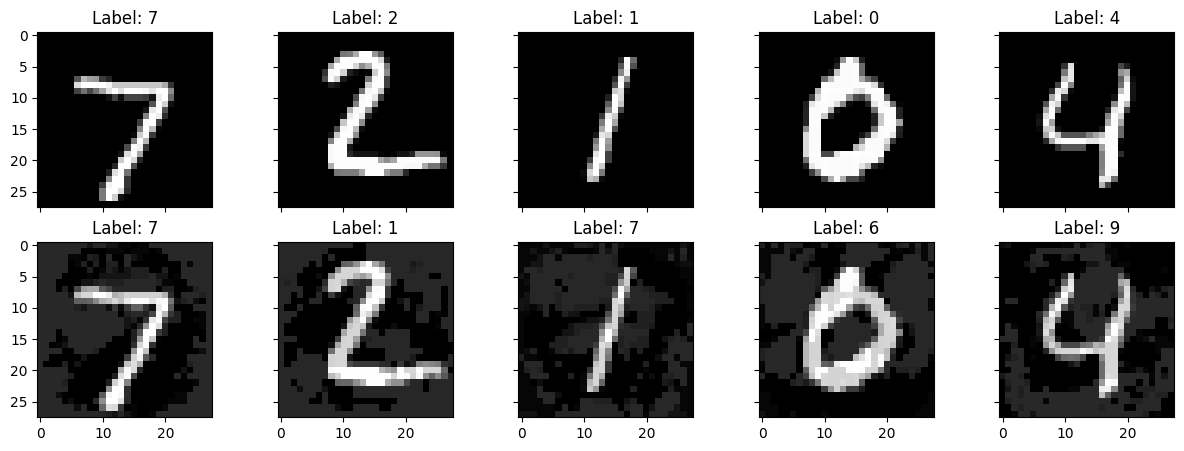

In [16]:
# Try PGD
attack = ProjectedGradientDescent(clean_classifier, batch_size=BATCH_SIZE)

print('Accuracy on adversarial test data: ', utils.evaluate_attack(attack, clean_classifier, X_test, y_test))
utils.plot_images(X_test, y_test, clean_classifier, attack, n=5)

DeepFool:   0%|          | 0/10 [00:00<?, ?it/s]

Accuracy on adversarial test data:  0.0134


DeepFool:   0%|          | 0/1 [00:00<?, ?it/s]

DeepFool:   0%|          | 0/1 [00:00<?, ?it/s]

DeepFool:   0%|          | 0/1 [00:00<?, ?it/s]

DeepFool:   0%|          | 0/1 [00:00<?, ?it/s]

DeepFool:   0%|          | 0/1 [00:00<?, ?it/s]

DeepFool:   0%|          | 0/1 [00:00<?, ?it/s]

DeepFool:   0%|          | 0/1 [00:00<?, ?it/s]

DeepFool:   0%|          | 0/1 [00:00<?, ?it/s]

DeepFool:   0%|          | 0/1 [00:00<?, ?it/s]

DeepFool:   0%|          | 0/1 [00:00<?, ?it/s]

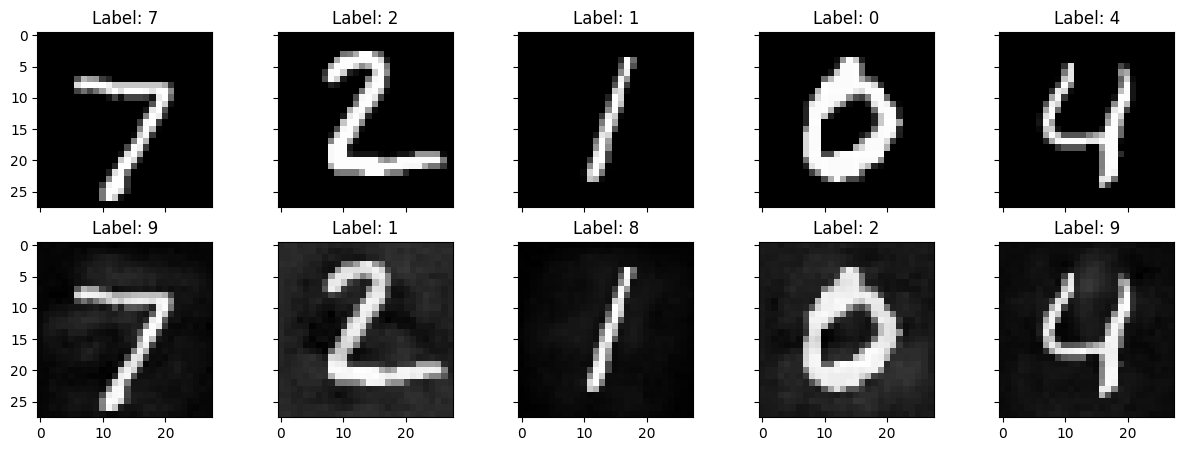

In [6]:
# Try deepfool

attack = DeepFool(clean_classifier, batch_size=BATCH_SIZE)
print('Accuracy on adversarial test data: ', utils.evaluate_attack(attack, clean_classifier, X_test, y_test))
utils.plot_images(X_test, y_test, clean_classifier, attack, n=5)

In [ ]:
# harden on BIM
hardened_model = deepcopy(clean_model)
hardened_classifier = PyTorchClassifier(
    model=hardened_model,
    loss=torch.nn.CrossEntropyLoss(),
    optimizer=torch.optim.Adam(hardened_model.parameters(), lr=0.01),
    input_shape=(1, 28, 28),
    nb_classes=10,
    preprocessing=(0.1307, 0.3081),
    device_type='gpu'
)
# Check if can load the model
try:
    hardened_model = torch.load('models/adversarial_state/BIM_CIFAR10_FC_500_100_10.pth')
except:
    attack = BasicIterativeMethod(hardened_classifier, batch_size=512)
    adv_trainer = AdversarialTrainer(hardened_classifier, attacks=attack, ratio=0.5)
    adv_trainer.fit(X_train, y_train, batch_size=512, nb_epochs=10)
    torch.save(adv_trainer.classifier.model, 'models/adversarial_state/BIM_CIFAR10_FC_500_100_10.pth')
    
eps_values = [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
utils.compare_classifiers(clean_classifier, adv_trainer.classifier, X_test, y_test, eps_values, batch_size=1000, title='CIFAR10_FC_500_100_10 Hardened with BIM')

print('Hardened model accuracy on PGD adversarial test data: ', utils.evaluate_attack(attack, adv_trainer.classifier, X_test, y_test))

Precompute adv samples:   0%|          | 0/1 [00:00<?, ?it/s]

Adversarial training epochs:   0%|          | 0/10 [00:00<?, ?it/s]

In [ ]:
# harden on PGD
hardened_model = deepcopy(clean_model)
hardened_classifier = PyTorchClassifier(
    model=hardened_model,
    loss=torch.nn.CrossEntropyLoss(),
    optimizer=torch.optim.Adam(hardened_model.parameters(), lr=0.01),
    input_shape=(1, 28, 28),
    nb_classes=10,
    preprocessing=(0.1307, 0.3081),
    device_type='gpu'
)
# Check if can load the model
try:
    hardened_model = torch.load('models/adversarial_state/PGD_CIFAR10_FC_500_100_10.pth')
except:
    attack = ProjectedGradientDescent(hardened_classifier, batch_size=512)
    adv_trainer = AdversarialTrainer(hardened_classifier, attacks=attack, ratio=0.5)
    adv_trainer.fit(X_train, y_train, batch_size=512, nb_epochs=10)
    torch.save(adv_trainer.classifier.model, 'models/adversarial_state/PGD_CIFAR10_FC_500_100_10.pth')
    
eps_values = [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
utils.compare_classifiers(clean_classifier, adv_trainer.classifier, X_test, y_test, eps_values, batch_size=1000, title='CIFAR10_FC_500_100_10 Hardened with PGD')

print('Hardened model accuracy on PGD adversarial test data: ', utils.evaluate_attack(attack, adv_trainer.classifier, X_test, y_test))

In [ ]:
# harden on FGSM
hardened_model = deepcopy(clean_model)
hardened_classifier = PyTorchClassifier(
    model=hardened_model,
    loss=torch.nn.CrossEntropyLoss(),
    optimizer=torch.optim.Adam(hardened_model.parameters(), lr=0.01),
    input_shape=(1, 28, 28),
    nb_classes=10,
    preprocessing=(0.1307, 0.3081),
    device_type='gpu'
)
# Check if can load the model
try:
    hardened_model = torch.load('models/adversarial_state/FGSM_CIFAR10_FC_500_100_10.pth')
except:
    attack = FastGradientMethod(hardened_classifier, batch_size=512)
    adv_trainer = AdversarialTrainer(hardened_classifier, attacks=attack, ratio=0.5)
    adv_trainer.fit(X_train, y_train, batch_size=512, nb_epochs=10)
    torch.save(adv_trainer.classifier.model, 'models/adversarial_state/FGSM_CIFAR10_FC_500_100_10.pth')
    
eps_values = [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
utils.compare_classifiers(clean_classifier, adv_trainer.classifier, X_test, y_test, eps_values, batch_size=1000, title='CIFAR10_FC_500_100_10 Hardened with FGSM')

print('Hardened model accuracy on PGD adversarial test data: ', utils.evaluate_attack(attack, adv_trainer.classifier, X_test, y_test))

In [ ]:
# harden on deepfool
hardened_model = deepcopy(clean_model)
hardened_classifier = PyTorchClassifier(
    model=hardened_model,
    loss=torch.nn.CrossEntropyLoss(),
    optimizer=torch.optim.Adam(hardened_model.parameters(), lr=0.01),
    input_shape=(1, 28, 28),
    nb_classes=10,
    preprocessing=(0.1307, 0.3081),
    device_type='gpu'
)
# Check if can load the model
try:
    hardened_model = torch.load('models/adversarial_state/DeepFool_CIFAR10_FC_500_100_10.pth')
except:
    attack = DeepFool(hardened_classifier, batch_size=512)
    adv_trainer = AdversarialTrainer(hardened_classifier, attacks=attack, ratio=0.5)
    adv_trainer.fit(X_train, y_train, batch_size=512, nb_epochs=10)
    torch.save(adv_trainer.classifier.model, 'models/adversarial_state/DeepFool_CIFAR10_FC_500_100_10.pth')
    
eps_values = [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
utils.compare_classifiers(clean_classifier, adv_trainer.classifier, X_test, y_test, eps_values, batch_size=1000, title='CIFAR10_FC_500_100_10 Hardened with DeepFool')

print('Hardened model accuracy on PGD adversarial test data: ', utils.evaluate_attack(attack, adv_trainer.classifier, X_test, y_test))

In [ ]:
# Load the VGG model
clean_model = CIFAR10_VGG()
clean_model.load_state_dict(torch.load('models/clean_state/CIFAR10_VGG.pth'))
clean_model.eval()
clean_classifier = PyTorchClassifier(
    model=clean_model,
    loss=torch.nn.CrossEntropyLoss(),
    optimizer=torch.optim.Adam(clean_model.parameters(), lr=0.01),
    input_shape=(1, 28, 28),
    nb_classes=10,
    preprocessing=(0.1307, 0.3081),
    device_type='gpu'
)

# Get the clean accuracy
clean_acc = np.sum(np.argmax(clean_classifier.predict(X_test), axis=1) == y_test) / len(y_test)
print(f'Clean accuracy: {clean_acc}')

attack = FastGradientMethod(clean_classifier, batch_size=BATCH_SIZE)

print('Accuracy on FGSM adversarial test data: ', utils.evaluate_attack(attack, clean_classifier, X_test, y_test))
utils.plot_images(X_test, y_test, clean_classifier, attack, n=5)

attack = BasicIterativeMethod(clean_classifier, batch_size=BATCH_SIZE)

print('Accuracy on BIM adversarial test data: ', utils.evaluate_attack(attack, clean_classifier, X_test, y_test))
utils.plot_images(X_test, y_test, clean_classifier, attack, n=5)

attack = ProjectedGradientDescent(clean_classifier, batch_size=BATCH_SIZE)

print('Accuracy on PGD adversarial test data: ', utils.evaluate_attack(attack, clean_classifier, X_test, y_test))
utils.plot_images(X_test, y_test, clean_classifier, attack, n=5)

attack = DeepFool(clean_classifier, batch_size=BATCH_SIZE)
print('Accuracy on DeepFool adversarial test data: ', utils.evaluate_attack(attack, clean_classifier, X_test, y_test))
utils.plot_images(X_test, y_test, clean_classifier, attack, n=5)

In [ ]:
# harden on BIM
hardened_model = deepcopy(clean_model)
hardened_classifier = PyTorchClassifier(
    model=hardened_model,
    loss=torch.nn.CrossEntropyLoss(),
    optimizer=torch.optim.Adam(hardened_model.parameters(), lr=0.01),
    input_shape=(1, 28, 28),
    nb_classes=10,
    preprocessing=(0.1307, 0.3081),
    device_type='gpu'
)
# Check if can load the model
try:
    hardened_model = torch.load('models/adversarial_state/BIM_CIFAR10_VGG.pth')
except:
    attack = BasicIterativeMethod(hardened_classifier, batch_size=512)
    adv_trainer = AdversarialTrainer(hardened_classifier, attacks=attack, ratio=0.5)
    adv_trainer.fit(X_train, y_train, batch_size=512, nb_epochs=10)
    torch.save(adv_trainer.classifier.model, 'models/adversarial_state/BIM_CIFAR10_VGG.pth')
    
eps_values = [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
utils.compare_classifiers(clean_classifier, adv_trainer.classifier, X_test, y_test, eps_values, batch_size=1000, title='CIFAR10_VGG Hardened with BIM')

print('Hardened model accuracy on PGD adversarial test data: ', utils.evaluate_attack(attack, adv_trainer.classifier, X_test, y_test))

In [ ]:
# harden on PGD
hardened_model = deepcopy(clean_model)
hardened_classifier = PyTorchClassifier(
    model=hardened_model,
    loss=torch.nn.CrossEntropyLoss(),
    optimizer=torch.optim.Adam(hardened_model.parameters(), lr=0.01),
    input_shape=(1, 28, 28),
    nb_classes=10,
    preprocessing=(0.1307, 0.3081),
    device_type='gpu'
)
# Check if can load the model
try:
    hardened_model = torch.load('models/adversarial_state/PGD_CIFAR10_VGG.pth')
except:
    attack = ProjectedGradientDescent(hardened_classifier, batch_size=512)
    adv_trainer = AdversarialTrainer(hardened_classifier, attacks=attack, ratio=0.5)
    adv_trainer.fit(X_train, y_train, batch_size=512, nb_epochs=10)
    torch.save(adv_trainer.classifier.model, 'models/adversarial_state/PGD_CIFAR10_VGG.pth')
    
eps_values = [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
utils.compare_classifiers(clean_classifier, adv_trainer.classifier, X_test, y_test, eps_values, batch_size=1000, title='CIFAR10_VGG Hardened with PGD')

print('Hardened model accuracy on PGD adversarial test data: ', utils.evaluate_attack(attack, adv_trainer.classifier, X_test, y_test))

In [ ]:
# harden on FGSM
hardened_model = deepcopy(clean_model)
hardened_classifier = PyTorchClassifier(
    model=hardened_model,
    loss=torch.nn.CrossEntropyLoss(),
    optimizer=torch.optim.Adam(hardened_model.parameters(), lr=0.01),
    input_shape=(1, 28, 28),
    nb_classes=10,
    preprocessing=(0.1307, 0.3081),
    device_type='gpu'
)
# Check if can load the model
try:
    hardened_model = torch.load('models/adversarial_state/FGSM_CIFAR10_VGG.pth')
except:
    attack = FastGradientMethod(hardened_classifier, batch_size=512)
    adv_trainer = AdversarialTrainer(hardened_classifier, attacks=attack, ratio=0.5)
    adv_trainer.fit(X_train, y_train, batch_size=512, nb_epochs=10)
    torch.save(adv_trainer.classifier.model, 'models/adversarial_state/FGSM_CIFAR10_VGG.pth')
    
eps_values = [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
utils.compare_classifiers(clean_classifier, adv_trainer.classifier, X_test, y_test, eps_values, batch_size=1000, title='CIFAR10_VGG Hardened with FGSM')

print('Hardened model accuracy on PGD adversarial test data: ', utils.evaluate_attack(attack, adv_trainer.classifier, X_test, y_test))

In [ ]:
# harden on deepfool
hardened_model = deepcopy(clean_model)
hardened_classifier = PyTorchClassifier(
    model=hardened_model,
    loss=torch.nn.CrossEntropyLoss(),
    optimizer=torch.optim.Adam(hardened_model.parameters(), lr=0.01),
    input_shape=(1, 28, 28),
    nb_classes=10,
    preprocessing=(0.1307, 0.3081),
    device_type='gpu'
)
# Check if can load the model
try:
    hardened_model = torch.load('models/adversarial_state/DeepFool_CIFAR10_VGG.pth')
except:
    attack = DeepFool(hardened_classifier, batch_size=512)
    adv_trainer = AdversarialTrainer(hardened_classifier, attacks=attack, ratio=0.5)
    adv_trainer.fit(X_train, y_train, batch_size=512, nb_epochs=10)
    torch.save(adv_trainer.classifier.model, 'models/adversarial_state/DeepFool_CIFAR10_VGG.pth')
    
eps_values = [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
utils.compare_classifiers(clean_classifier, adv_trainer.classifier, X_test, y_test, eps_values, batch_size=1000, title='CIFAR10_VGG Hardened with DeepFool')

print('Hardened model accuracy on PGD adversarial test data: ', utils.evaluate_attack(attack, adv_trainer.classifier, X_test, y_test))

In [ ]:
# Load the LeNet model
clean_model = CIFAR10_LeNet()
clean_model.load_state_dict(torch.load('models/clean_state/CIFAR10_LeNet.pth'))
clean_model.eval()
clean_classifier = PyTorchClassifier(
    model=clean_model,
    loss=torch.nn.CrossEntropyLoss(),
    optimizer=torch.optim.Adam(clean_model.parameters(), lr=0.01),
    input_shape=(1, 28, 28),
    nb_classes=10,
    preprocessing=(0.1307, 0.3081),
    device_type='gpu'
)

# Get the clean accuracy
clean_acc = np.sum(np.argmax(clean_classifier.predict(X_test), axis=1) == y_test) / len(y_test)
print(f'Clean accuracy: {clean_acc}')

attack = FastGradientMethod(clean_classifier, batch_size=BATCH_SIZE)

print('Accuracy on FGSM adversarial test data: ', utils.evaluate_attack(attack, clean_classifier, X_test, y_test))

attack = BasicIterativeMethod(clean_classifier, batch_size=BATCH_SIZE)

print('Accuracy on BIM adversarial test data: ', utils.evaluate_attack(attack, clean_classifier, X_test, y_test))

attack = ProjectedGradientDescent(clean_classifier, batch_size=BATCH_SIZE)

print('Accuracy on PGD adversarial test data: ', utils.evaluate_attack(attack, clean_classifier, X_test, y_test))

attack = DeepFool(clean_classifier, batch_size=BATCH_SIZE)

print('Accuracy on DeepFool adversarial test data: ', utils.evaluate_attack(attack, clean_classifier, X_test, y_test))

In [ ]:
# harden on BIM
hardened_model = deepcopy(clean_model)
hardened_classifier = PyTorchClassifier(
    model=hardened_model,
    loss=torch.nn.CrossEntropyLoss(),
    optimizer=torch.optim.Adam(hardened_model.parameters(), lr=0.01),
    input_shape=(1, 28, 28),
    nb_classes=10,
    preprocessing=(0.1307, 0.3081),
    device_type='gpu'
)
# Check if can load the model
try:
    hardened_model = torch.load('models/adversarial_state/BIM_CIFAR10_LeNet.pth')
except:
    attack = BasicIterativeMethod(hardened_classifier, batch_size=512)
    adv_trainer = AdversarialTrainer(hardened_classifier, attacks=attack, ratio=0.5)
    adv_trainer.fit(X_train, y_train, batch_size=512, nb_epochs=10)
    torch.save(adv_trainer.classifier.model, 'models/adversarial_state/BIM_CIFAR10_LeNet.pth')
    
eps_values = [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
utils.compare_classifiers(clean_classifier, adv_trainer.classifier, X_test, y_test, eps_values, batch_size=1000, title='CIFAR10_LeNet Hardened with BIM')

print('Hardened model accuracy on PGD adversarial test data: ', utils.evaluate_attack(attack, adv_trainer.classifier, X_test, y_test))

In [ ]:
# harden on PGD
hardened_model = deepcopy(clean_model)
hardened_classifier = PyTorchClassifier(
    model=hardened_model,
    loss=torch.nn.CrossEntropyLoss(),
    optimizer=torch.optim.Adam(hardened_model.parameters(), lr=0.01),
    input_shape=(1, 28, 28),
    nb_classes=10,
    preprocessing=(0.1307, 0.3081),
    device_type='gpu'
)
# Check if can load the model
try:
    hardened_model = torch.load('models/adversarial_state/PGD_CIFAR10_LeNet.pth')
except:
    attack = ProjectedGradientDescent(hardened_classifier, batch_size=512)
    adv_trainer = AdversarialTrainer(hardened_classifier, attacks=attack, ratio=0.5)
    adv_trainer.fit(X_train, y_train, batch_size=512, nb_epochs=10)
    torch.save(adv_trainer.classifier.model, 'models/adversarial_state/PGD_CIFAR10_LeNet.pth')
    
eps_values = [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
utils.compare_classifiers(clean_classifier, adv_trainer.classifier, X_test, y_test, eps_values, batch_size=1000, title='CIFAR10_LeNet Hardened with PGD')

print('Hardened model accuracy on PGD adversarial test data: ', utils.evaluate_attack(attack, adv_trainer.classifier, X_test, y_test))

In [ ]:
# harden on FGSM
hardened_model = deepcopy(clean_model)
hardened_classifier = PyTorchClassifier(
    model=hardened_model,
    loss=torch.nn.CrossEntropyLoss(),
    optimizer=torch.optim.Adam(hardened_model.parameters(), lr=0.01),
    input_shape=(1, 28, 28),
    nb_classes=10,
    preprocessing=(0.1307, 0.3081),
    device_type='gpu'
)

# Check if can load the model
try:
    hardened_model = torch.load('models/adversarial_state/FGSM_CIFAR10_LeNet.pth')
except:
    attack = FastGradientMethod(hardened_classifier, batch_size=512)
    adv_trainer = AdversarialTrainer(hardened_classifier, attacks=attack, ratio=0.5)
    adv_trainer.fit(X_train, y_train, batch_size=512, nb_epochs=10)
    torch.save(adv_trainer.classifier.model, 'models/adversarial_state/FGSM_CIFAR10_LeNet.pth')
    
eps_values = [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
utils.compare_classifiers(clean_classifier, adv_trainer.classifier, X_test, y_test, eps_values, batch_size=1000, title='CIFAR10_LeNet Hardened with FGSM')

print('Hardened model accuracy on PGD adversarial test data: ', utils.evaluate_attack(attack, adv_trainer.classifier, X_test, y_test))

In [ ]:
# harden on deepfool
hardened_model = deepcopy(clean_model)
hardened_classifier = PyTorchClassifier(
    model=hardened_model,
    loss=torch.nn.CrossEntropyLoss(),
    optimizer=torch.optim.Adam(hardened_model.parameters(), lr=0.01),
    input_shape=(1, 28, 28),
    nb_classes=10,
    preprocessing=(0.1307, 0.3081),
    device_type='gpu'
)
# Check if can load the model
try:
    hardened_model = torch.load('models/adversarial_state/DeepFool_CIFAR10_LeNet.pth')
except:
    attack = DeepFool(hardened_classifier, batch_size=512)
    adv_trainer = AdversarialTrainer(hardened_classifier, attacks=attack, ratio=0.5)
    adv_trainer.fit(X_train, y_train, batch_size=512, nb_epochs=10)
    torch.save(adv_trainer.classifier.model, 'models/adversarial_state/DeepFool_CIFAR10_LeNet.pth')
    
eps_values = [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
utils.compare_classifiers(clean_classifier, adv_trainer.classifier, X_test, y_test, eps_values, batch_size=1000, title='CIFAR10_LeNet Hardened with DeepFool')

print('Hardened model accuracy on PGD adversarial test data: ', utils.evaluate_attack(attack, adv_trainer.classifier, X_test, y_test))

In [ ]:
# Load the ResNet model
clean_model = CIFAR10_ResNet()
clean_model.load_state_dict(torch.load('models/clean_state/CIFAR10_ResNet.pth'))
clean_model.eval()
clean_classifier = PyTorchClassifier(
    model=clean_model,
    loss=torch.nn.CrossEntropyLoss(),
    optimizer=torch.optim.Adam(clean_model.parameters(), lr=0.01),
    input_shape=(1, 28, 28),
    nb_classes=10,
    preprocessing=(0.1307, 0.3081),
    device_type='gpu'
)

# Get the clean accuracy
clean_acc = np.sum(np.argmax(clean_classifier.predict(X_test), axis=1) == y_test) / len(y_test)
print(f'Clean accuracy: {clean_acc}')

attack = FastGradientMethod(clean_classifier, batch_size=BATCH_SIZE)

print('Accuracy on FGSM adversarial test data: ', utils.evaluate_attack(attack, clean_classifier, X_test, y_test))

attack = BasicIterativeMethod(clean_classifier, batch_size=BATCH_SIZE)

print('Accuracy on BIM adversarial test data: ', utils.evaluate_attack(attack, clean_classifier, X_test, y_test))

attack = ProjectedGradientDescent(clean_classifier, batch_size=BATCH_SIZE)

print('Accuracy on PGD adversarial test data: ', utils.evaluate_attack(attack, clean_classifier, X_test, y_test))

attack = DeepFool(clean_classifier, batch_size=BATCH_SIZE)

print('Accuracy on DeepFool adversarial test data: ', utils.evaluate_attack(attack, clean_classifier, X_test, y_test))

In [ ]:
# harden on BIM
hardened_model = deepcopy(clean_model)

hardened_classifier = PyTorchClassifier(
    model=hardened_model,
    loss=torch.nn.CrossEntropyLoss(),
    optimizer=torch.optim.Adam(hardened_model.parameters(), lr=0.01),
    input_shape=(1, 28, 28),
    nb_classes=10,
    preprocessing=(0.1307, 0.3081),
    device_type='gpu'
)

# Check if can load the model
try:
    hardened_model = torch.load('models/adversarial_state/BIM_CIFAR10_ResNet.pth')
except:
    attack = BasicIterativeMethod(hardened_classifier, batch_size=512)
    adv_trainer = AdversarialTrainer(hardened_classifier, attacks=attack, ratio=0.5)
    adv_trainer.fit(X_train, y_train, batch_size=512, nb_epochs=10)
    torch.save(adv_trainer.classifier.model, 'models/adversarial_state/BIM_CIFAR10_ResNet.pth')
    
eps_values = [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
utils.compare_classifiers(clean_classifier, adv_trainer.classifier, X_test, y_test, eps_values, batch_size=1000, title='CIFAR10_ResNet Hardened with BIM')

print('Hardened model accuracy on PGD adversarial test data: ', utils.evaluate_attack(attack, adv_trainer.classifier, X_test, y_test))

In [ ]:
# harden on PGD
hardened_model = deepcopy(clean_model)
hardened_classifier = PyTorchClassifier(
    model=hardened_model,
    loss=torch.nn.CrossEntropyLoss(),
    optimizer=torch.optim.Adam(hardened_model.parameters(), lr=0.01),
    input_shape=(1, 28, 28),
    nb_classes=10,
    preprocessing=(0.1307, 0.3081),
    device_type='gpu'
)

# Check if can load the model
try:
    hardened_model = torch.load('models/adversarial_state/PGD_CIFAR10_ResNet.pth')
except:
    attack = ProjectedGradientDescent(hardened_classifier, batch_size=512)
    adv_trainer = AdversarialTrainer(hardened_classifier, attacks=attack, ratio=0.5)
    adv_trainer.fit(X_train, y_train, batch_size=512, nb_epochs=10)
    torch.save(adv_trainer.classifier.model, 'models/adversarial_state/PGD_CIFAR10_ResNet.pth')
    
eps_values = [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
utils.compare_classifiers(clean_classifier, adv_trainer.classifier, X_test, y_test, eps_values, batch_size=1000, title='CIFAR10_ResNet Hardened with PGD')

print('Hardened model accuracy on PGD adversarial test data: ', utils.evaluate_attack(attack, adv_trainer.classifier, X_test, y_test))

In [ ]:
# harden on FGSM
hardened_model = deepcopy(clean_model)
hardened_classifier = PyTorchClassifier(
    model=hardened_model,
    loss=torch.nn.CrossEntropyLoss(),
    optimizer=torch.optim.Adam(hardened_model.parameters(), lr=0.01),
    input_shape=(1, 28, 28),
    nb_classes=10,
    preprocessing=(0.1307, 0.3081),
    device_type='gpu'
)

# Check if can load the model
try:
    hardened_model = torch.load('models/adversarial_state/FGSM_CIFAR10_ResNet.pth')
except:
    attack = FastGradientMethod(hardened_classifier, batch_size=512)
    adv_trainer = AdversarialTrainer(hardened_classifier, attacks=attack, ratio=0.5)
    adv_trainer.fit(X_train, y_train, batch_size=512, nb_epochs=10)
    torch.save(adv_trainer.classifier.model, 'models/adversarial_state/FGSM_CIFAR10_ResNet.pth')
    
eps_values = [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
utils.compare_classifiers(clean_classifier, adv_trainer.classifier, X_test, y_test, eps_values, batch_size=1000, title='CIFAR10_ResNet Hardened with FGSM')

print('Hardened model accuracy on PGD adversarial test data: ', utils.evaluate_attack(attack, adv_trainer.classifier, X_test, y_test))

In [ ]:
# harden on deepfool
hardened_model = deepcopy(clean_model)
hardened_classifier = PyTorchClassifier(
    model=hardened_model,
    loss=torch.nn.CrossEntropyLoss(),
    optimizer=torch.optim.Adam(hardened_model.parameters(), lr=0.01),
    input_shape=(1, 28, 28),
    nb_classes=10,
    preprocessing=(0.1307, 0.3081),
    device_type='gpu'
)

# Check if can load the model
try:
    hardened_model = torch.load('models/adversarial_state/DeepFool_CIFAR10_ResNet.pth')
except:
    attack = DeepFool(hardened_classifier, batch_size=512)
    adv_trainer = AdversarialTrainer(hardened_classifier, attacks=attack, ratio=0.5)
    adv_trainer.fit(X_train, y_train, batch_size=512, nb_epochs=10)
    torch.save(adv_trainer.classifier.model, 'models/adversarial_state/DeepFool_CIFAR10_ResNet.pth')
    
eps_values = [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
utils.compare_classifiers(clean_classifier, adv_trainer.classifier, X_test, y_test, eps_values, batch_size=1000, title='CIFAR10_ResNet Hardened with DeepFool')

print('Hardened model accuracy on PGD adversarial test data: ', utils.evaluate_attack(attack, adv_trainer.classifier, X_test, y_test))

In [ ]:
# Load the GoogLeNet model
clean_model = CIFAR10_GoogLeNet()
clean_model.load_state_dict(torch.load('models/clean_state/CIFAR10_GoogLeNet.pth'))
clean_model.eval()
clean_classifier = PyTorchClassifier(
    model=clean_model,
    loss=torch.nn.CrossEntropyLoss(),
    optimizer=torch.optim.Adam(clean_model.parameters(), lr=0.01),
    input_shape=(1, 28, 28),
    nb_classes=10,
    preprocessing=(0.1307, 0.3081),
    device_type='gpu'
)

# Get the clean accuracy
clean_acc = np.sum(np.argmax(clean_classifier.predict(X_test), axis=1) == y_test) / len(y_test)
print(f'Clean accuracy: {clean_acc}')

attack = FastGradientMethod(clean_classifier, batch_size=BATCH_SIZE)

print('Accuracy on FGSM adversarial test data: ', utils.evaluate_attack(attack, clean_classifier, X_test, y_test))

attack = BasicIterativeMethod(clean_classifier, batch_size=BATCH_SIZE)

print('Accuracy on BIM adversarial test data: ', utils.evaluate_attack(attack, clean_classifier, X_test, y_test))

attack = ProjectedGradientDescent(clean_classifier, batch_size=BATCH_SIZE)

print('Accuracy on PGD adversarial test data: ', utils.evaluate_attack(attack, clean_classifier, X_test, y_test))

attack = DeepFool(clean_classifier, batch_size=BATCH_SIZE)

print('Accuracy on DeepFool adversarial test data: ', utils.evaluate_attack(attack, clean_classifier, X_test, y_test))

In [ ]:
# harden on BIM
hardened_model = deepcopy(clean_model)
hardened_classifier = PyTorchClassifier(
    model=hardened_model,
    loss=torch.nn.CrossEntropyLoss(),
    optimizer=torch.optim.Adam(hardened_model.parameters(), lr=0.01),
    input_shape=(1, 28, 28),
    nb_classes=10,
    preprocessing=(0.1307, 0.3081),
    device_type='gpu'
)

# Check if can load the model
try:
    hardened_model = torch.load('models/adversarial_state/BIM_CIFAR10_GoogLeNet.pth')
except:
    attack = BasicIterativeMethod(hardened_classifier, batch_size=512)
    adv_trainer = AdversarialTrainer(hardened_classifier, attacks=attack, ratio=0.5)
    adv_trainer.fit(X_train, y_train, batch_size=512, nb_epochs=10)
    torch.save(adv_trainer.classifier.model, 'models/adversarial_state/BIM_CIFAR10_GoogLeNet.pth')
    
eps_values = [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
utils.compare_classifiers(clean_classifier, adv_trainer.classifier, X_test, y_test, eps_values, batch_size=1000, title='CIFAR10_GoogLeNet Hardened with BIM')

print('Hardened model accuracy on PGD adversarial test data: ', utils.evaluate_attack(attack, adv_trainer.classifier, X_test, y_test))

In [ ]:
# harden on PGD
hardened_model = deepcopy(clean_model)
hardened_classifier = PyTorchClassifier(
    model=hardened_model,
    loss=torch.nn.CrossEntropyLoss(),
    optimizer=torch.optim.Adam(hardened_model.parameters(), lr=0.01),
    input_shape=(1, 28, 28),
    nb_classes=10,
    preprocessing=(0.1307, 0.3081),
    device_type='gpu'
)

# Check if can load the model
try:
    hardened_model = torch.load('models/adversarial_state/PGD_CIFAR10_GoogLeNet.pth')
except:
    attack = ProjectedGradientDescent(hardened_classifier, batch_size=512)
    adv_trainer = AdversarialTrainer(hardened_classifier, attacks=attack, ratio=0.5)
    adv_trainer.fit(X_train, y_train, batch_size=512, nb_epochs=10)
    torch.save(adv_trainer.classifier.model, 'models/adversarial_state/PGD_CIFAR10_GoogLeNet.pth')
    
eps_values = [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
utils.compare_classifiers(clean_classifier, adv_trainer.classifier, X_test, y_test, eps_values, batch_size=1000, title='CIFAR10_GoogLeNet Hardened with PGD')

print('Hardened model accuracy on PGD adversarial test data: ', utils.evaluate_attack(attack, adv_trainer.classifier, X_test, y_test))

In [ ]:
# harden on FGSM
hardened_model = deepcopy(clean_model)
hardened_classifier = PyTorchClassifier(
    model=hardened_model,
    loss=torch.nn.CrossEntropyLoss(),
    optimizer=torch.optim.Adam(hardened_model.parameters(), lr=0.01),
    input_shape=(1, 28, 28),
    nb_classes=10,
    preprocessing=(0.1307, 0.3081),
    device_type='gpu'
)

# Check if can load the model
try:
    hardened_model = torch.load('models/adversarial_state/FGSM_CIFAR10_GoogLeNet.pth')
except:
    attack = FastGradientMethod(hardened_classifier, batch_size=512)
    adv_trainer = AdversarialTrainer(hardened_classifier, attacks=attack, ratio=0.5)
    adv_trainer.fit(X_train, y_train, batch_size=512, nb_epochs=10)
    torch.save(adv_trainer.classifier.model, 'models/adversarial_state/FGSM_CIFAR10_GoogLeNet.pth')
    
eps_values = [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
utils.compare_classifiers(clean_classifier, adv_trainer.classifier, X_test, y_test, eps_values, batch_size=1000, title='CIFAR10_GoogLeNet Hardened with FGSM')

print('Hardened model accuracy on PGD adversarial test data: ', utils.evaluate_attack(attack, adv_trainer.classifier, X_test, y_test))

In [ ]:
# harden on deepfool

hardened_model = deepcopy(clean_model)
hardened_classifier = PyTorchClassifier(
    model=hardened_model,
    loss=torch.nn.CrossEntropyLoss(),
    optimizer=torch.optim.Adam(hardened_model.parameters(), lr=0.01),
    input_shape=(1, 28, 28),
    nb_classes=10,
    preprocessing=(0.1307, 0.3081),
    device_type='gpu'
)

# Check if can load the model

try:
    hardened_model = torch.load('models/adversarial_state/DeepFool_CIFAR10_GoogLeNet.pth')
except:
    attack = DeepFool(hardened_classifier, batch_size=512)
    adv_trainer = AdversarialTrainer(hardened_classifier, attacks=attack, ratio=0.5)
    adv_trainer.fit(X_train, y_train, batch_size=512, nb_epochs=10)
    torch.save(adv_trainer.classifier.model, 'models/adversarial_state/DeepFool_CIFAR10_GoogLeNet.pth')
    
eps_values = [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
utils.compare_classifiers(clean_classifier, adv_trainer.classifier, X_test, y_test, eps_values, batch_size=1000, title='CIFAR10_GoogLeNet Hardened with DeepFool')

print('Hardened model accuracy on PGD adversarial test data: ', utils.evaluate_attack(attack, adv_trainer.classifier, X_test, y_test))